In [1]:
import pandas as pd
import numpy as np

import importlib
import matplotlib.pyplot as plt

import shap
import pickle
import gzip
import os

os.chdir('../')
from functions.shap import create_shape_explanation

# Load all data

In [2]:
with gzip.open('data/gzipX_FFT.pckl', 'rb') as f:
    X_all = pickle.load(f)

with gzip.open('data/gzipy_FFT.pckl', 'rb') as f:
    y_all = pickle.load(f)

# Load RFM model

In [3]:
with open('data/rfm_model_1e6_FFT.pckl', 'rb') as f:
    rfm = pickle.load(f)

In [4]:
feature_importances = rfm.feature_imp

# Load feature importances for the above RFM model

In [5]:
with open('data/feature_importances_rfm1e6_FFT.pckl', 'rb') as f:
    feature_importances = pickle.load(f)

In [6]:
explanation_rfm_FFT = create_shape_explanation(rfm.model, X_all, y_all)

In [7]:
with open('data/rfm_explanation_1e6_FFT.pckl', 'wb') as f:
    pickle.dump(explanation_rfm_FFT, f)

In [7]:
shap_values = explanation_rfm_FFT.values

In [8]:
shap.plots.initjs()

In [9]:
[(x[0], float(np.round(x[1], 4))) for x in feature_importances]

[('07_harmonic_CVArea', 0.0196),
 ('07_harmonic_CCArea', 0.0133),
 ('08_harmonic_CCArea', 0.0117),
 ('06_harmonic_CCArea', 0.0092),
 ('00_harmonic_CCArea', 0.0077),
 ('05_harmonic_CVArea', 0.0068),
 ('09_harmonic_CVArea', 0.0065),
 ('04_harmonic_CVArea', 0.0059),
 ('04_harmonic_CCArea', 0.0059),
 ('4_Charge_Capacity', 0.0058),
 ('08_harmonic_CVArea', 0.0053),
 ('10_CycleTime', 0.0052),
 ('00_harmonic_CVArea', 0.0051),
 ('41_CycleTime', 0.0051),
 ('5_CycleTime', 0.0051),
 ('4_CycleTime', 0.005),
 ('09_harmonic_CCArea', 0.0049),
 ('05_harmonic_CCArea', 0.0049),
 ('72_CycleTime', 0.0049),
 ('14_Charge_Capacity', 0.0049),
 ('42_CycleTime', 0.0049),
 ('15_CycleTime', 0.0048),
 ('8_CycleTime', 0.0048),
 ('18_Charge_Capacity', 0.0048),
 ('16_CycleTime', 0.0047),
 ('06_harmonic_CVArea', 0.0047),
 ('17_CycleTime', 0.0047),
 ('9_CycleTime', 0.0047),
 ('70_CycleTime', 0.0046),
 ('14_CycleTime', 0.0046),
 ('69_CycleTime', 0.0046),
 ('79_CycleTime', 0.0046),
 ('78_CycleTime', 0.0046),
 ('19_CycleTi

In [10]:
mean = np.mean(X_all, axis = 0)
std = np.std(X_all, axis = 0)
X_all_scaled = ((X_all - mean+0.001)/(std+1e-10))


In [11]:
X_all = X_all.astype(float)

In [12]:
# Need to scale all features before display

mean = np.mean(X_all, axis = 0)
min_ = np.min(X_all, axis = 0)
max_ = np.max(X_all, axis = 0)
std = np.std(X_all, axis = 0)

X_all_scaled = (X_all - mean)/(std+0.001)
X_all_scaled


,2_Charge_Capacity,3_Charge_Capacity,4_Charge_Capacity,5_Charge_Capacity,6_Charge_Capacity,7_Charge_Capacity,8_Charge_Capacity,9_Charge_Capacity,10_Charge_Capacity,11_Charge_Capacity,...,00_harmonic_CVArea,01_harmonic_CVArea,02_harmonic_CVArea,03_harmonic_CVArea,04_harmonic_CVArea,05_harmonic_CVArea,06_harmonic_CVArea,07_harmonic_CVArea,08_harmonic_CVArea,09_harmonic_CVArea
2017-06-30_4_4C-55per_6C_CH19,0.0,-0.969720,-0.598058,-0.528344,-0.797488,-0.806520,-0.824592,-1.039096,-1.012412,-1.136859,...,0.570551,2.992301,-0.323401,0.085737,-0.020392,0.344340,0.344440,0.326229,0.052871,1.798963
2018-04-12_batch8_CH38,0.0,-0.417311,-0.635294,-0.675312,-0.834330,-0.904140,-0.912703,-0.983800,-1.026161,-0.983755,...,1.326107,-0.833309,-0.849724,-0.452823,-0.285111,-0.549270,-0.369878,-0.477596,-0.711628,-0.938891
2018-04-12_batch8_CH10,0.0,-0.259973,-0.351092,-0.277983,-0.327956,-0.221402,-0.204636,-0.102878,-0.122839,-0.104165,...,-0.491004,-0.530129,-0.779431,-0.467810,-0.348747,-0.805715,-0.453755,-0.498135,-0.735354,-0.940100
2017-05-12_7C-30per_3_6C_CH39,0.0,-0.019242,-0.134857,-0.256464,-0.303936,-0.289594,-0.232003,-0.626964,-0.170351,-0.117696,...,-0.150801,-0.835587,-0.215873,-0.114016,-0.049466,0.187385,-0.068946,-0.303004,-0.431465,-0.116395
2017-06-30_3_6C-80per_3_6C_CH1,0.0,-0.912171,-1.006496,-0.928821,-1.129995,-1.401721,-1.176732,-1.006596,-1.432249,-1.412390,...,0.613836,0.616870,1.165636,0.247887,0.024090,0.505519,-0.151151,-0.229918,-0.512776,-0.441382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-12_7C-40per_3_6C_CH41,0.0,-0.001993,-0.277064,-0.310014,-0.277925,-0.234710,-0.200190,-0.223055,-0.181270,-0.153231,...,-0.070663,-0.677715,0.489466,-0.182384,0.023294,0.069530,-0.226428,-0.361601,-0.622240,-0.720303
2018-04-12_batch8_CH21,0.0,-0.144201,-0.207140,-0.218437,-0.235420,-0.329492,-0.265418,-0.233694,-0.225908,-0.252720,...,-0.316504,1.246135,-0.464216,-0.418025,-0.279150,-0.812353,-0.377473,-0.481310,-0.724500,-0.935592
2018-04-12_batch8_CH35,0.0,-0.129162,-0.148019,-0.181725,-0.166364,-0.053104,0.002131,0.030936,0.032408,0.023226,...,0.423404,-0.985237,-0.901059,-0.478129,-0.356649,-0.874224,-0.474860,-0.517512,-0.736048,-0.960572
2017-06-30_4_8C-80per_4_8C_CH8,0.0,0.632073,0.797102,0.485406,0.688596,0.685920,0.436307,0.611260,0.575372,0.494338,...,1.328246,-0.896750,-0.685039,-0.281259,-0.100777,-0.147500,-0.291474,-0.111116,1.326764,1.555874


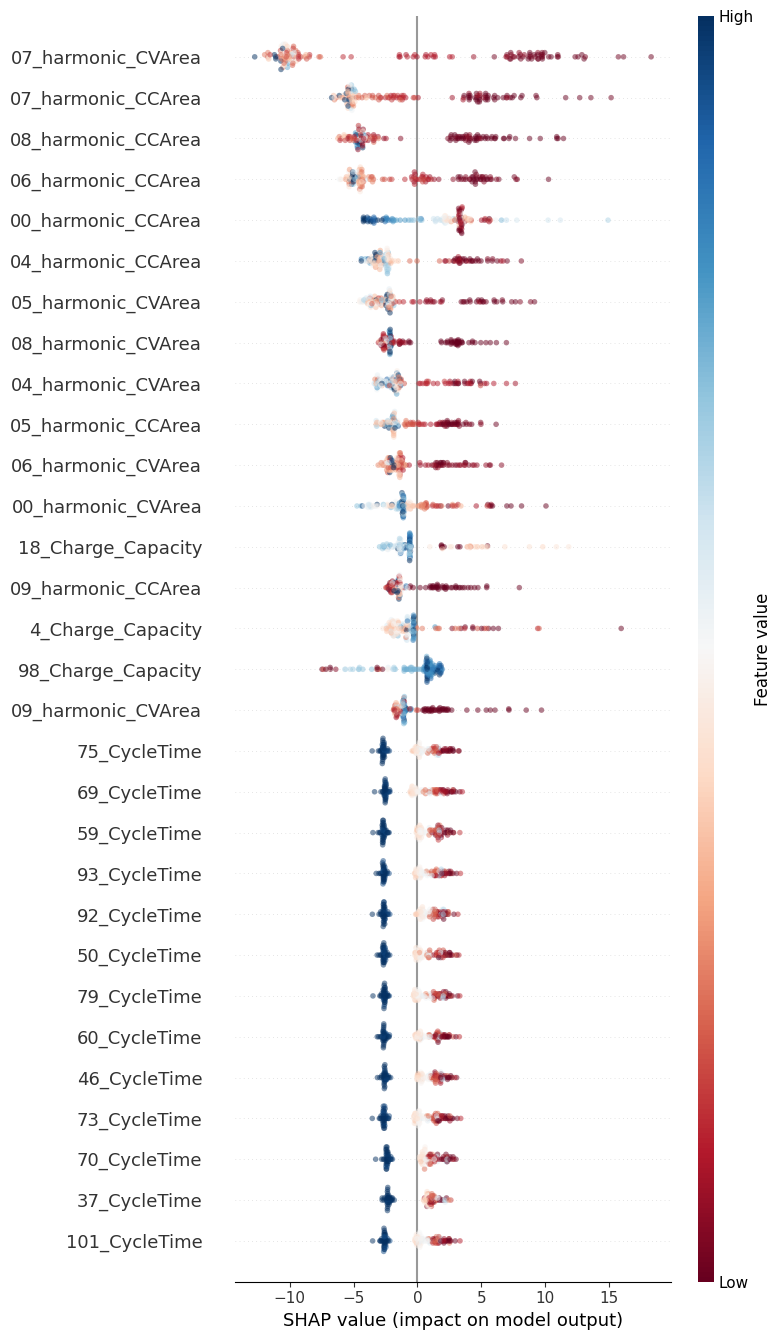

In [13]:
shap.summary_plot(shap_values, 
                  X_all_scaled, 
                  cmap = 'RdBu', 
                  alpha = 0.5,
                  show_values_in_legend = True,
                  max_display = 30)

In [88]:
indices = [i for i, col in enumerate(X_all_scaled.columns) if "CC" in col]
indices = sorted(indices)

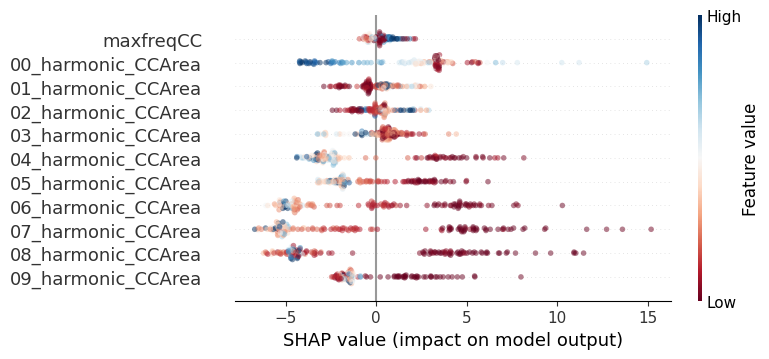

In [89]:
shap.summary_plot(shap_values[:, indices], 
                  X_all_scaled.iloc[:, indices], 
                  cmap = 'RdBu', 
                  sort = False,
                  show = False,
                  alpha = 0.5,
                  plot_size= 0.2,
                  # show_values_in_legend = True,
    # layered_violin_max_num_bins=100,
                  max_display = 100)
plt.savefig('figures/shapley_analysis/shapley_CC.png')

In [41]:
shap.summary_plot?

Signature:
shap.summary_plot(
    shap_values,
    features=None,
    feature_names=None,
    max_display=None,
    plot_type=None,
    color=None,
    axis_color='#333333',
    title=None,
    alpha=1,
    show=True,
    sort=True,
    color_bar=True,
    plot_size='auto',
    layered_violin_max_num_bins=20,
    class_names=None,
    class_inds=None,
    color_bar_label='Feature value',
    cmap=<matplotlib.colors.LinearSegmentedColormap object at 0x1240e1250>,
    show_values_in_legend=False,
    use_log_scale=False,
)
Docstring:
Create a SHAP beeswarm plot, colored by feature values when they are provided.

Parameters
----------
shap_values : numpy.array
    For single output explanations this is a matrix of SHAP values (# samples x # features).
    For multi-output explanations this is a list of such matrices of SHAP values.

features : numpy.array or pandas.DataFrame or list
    Matrix of feature values (# samples x # features) or a feature_names list as shorthand

feature_names :